## 선형 회귀분석

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
# 통계 관련 라이브러리를 호출합니다.
from scipy import stats
import pingouin as pg

In [3]:
# 시각화 설정 모듈을 호출합니다.
from GraphicSetting import *

# 통계 분석 및 머신러닝 관련 모듈을 호출합니다.
import HelloDataScience as hds

### 작업 경로 확인 및 변경

In [4]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/PythonAdvanced/code'

In [5]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir('../data')

In [6]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z',
 'Used_Cars_Price.xlsx',
 'Seafood_Trade_Prep.z',
 'Used_Cars_Price_Prep.z',
 'Used_Cars_Price.csv']

### 실습 데이터셋 준비

In [7]:
# z 파일을 읽고 데이터프레임 df를 생성합니다.
df = joblib.load(filename = 'Used_Cars_Price_Prep.z')

In [8]:
# df의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1251 non-null   int64 
 1   Age       1251 non-null   int64 
 2   KM        1251 non-null   int64 
 3   FuelType  1251 non-null   object
 4   HP        1251 non-null   int64 
 5   MetColor  1251 non-null   object
 6   Doors     1251 non-null   int64 
 7   Weight    1251 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 78.3+ KB


In [9]:
# df의 처음 5행을 출력합니다.
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,23,46986,Diesel,90,1,3,1165
1,13750,23,72937,Diesel,90,1,3,1165
2,13950,24,41711,Diesel,90,1,3,1165
3,14950,26,48000,Diesel,90,0,3,1165
4,13750,30,38500,Diesel,90,0,3,1170


In [10]:
# y절편 역할을 수행할 상수 1을 df의 두 번째 열로 삽입합니다.
df.insert(loc = 1, column = 'const', value = 1)

### 더미변수 생성

In [11]:
# FuelType으로 더미변수를 생성합니다.
df = pd.get_dummies(data = df, prefix = [None], 
                    columns = ['FuelType'], 
                    drop_first = True)

In [12]:
# df의 처음 10행을 출력합니다.
df.head(n = 10)

,Price,const,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,13500,1,23,46986,90,1,3,1165,0
1,13750,1,23,72937,90,1,3,1165,0
2,13950,1,24,41711,90,1,3,1165,0
3,14950,1,26,48000,90,0,3,1165,0
4,13750,1,30,38500,90,0,3,1170,0
5,12950,1,32,61000,90,0,3,1170,0
6,12950,1,23,71138,69,0,3,1105,0
7,12950,1,29,9750,97,1,3,1100,1
8,14950,1,26,32692,97,1,3,1100,1
9,14950,1,23,10000,97,1,3,1100,1


In [13]:
# df의 열별 자료형을 확인합니다.
df.dtypes

Price        int64
const        int64
Age          int64
KM           int64
HP           int64
MetColor    object
Doors        int64
Weight       int64
Petrol       uint8
dtype: object

In [14]:
# 더미변수로 변환할 문자형 열이름으로 리스트를 생성합니다.
cols = ['MetColor']

In [15]:
# 지정한 변수를 정수형으로 일괄 변환합니다.
df[cols] = df[cols].astype(np.uint8)

In [16]:
# df의 열별 자료형을 확인합니다.
df.dtypes

Price       int64
const       int64
Age         int64
KM          int64
HP          int64
MetColor    uint8
Doors       int64
Weight      int64
Petrol      uint8
dtype: object

### 실습 데이터셋 분할

In [17]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [18]:
# 전체 데이터의 70%를 훈련셋, 30%를 시험셋으로 분할합니다.
trSet, teSet = train_test_split(df, test_size = 0.3, random_state = 0)

In [19]:
# 훈련셋의 목표변수 평균을 확인합니다.
trSet['Price'].mean()

9732.848

In [20]:
# 시험셋의 목표변수 평균을 확인합니다.
teSet['Price'].mean()

9625.545212765957

### 입력변수와 목표변수 분리

In [21]:
# 목표변수명을 변수에 할당합니다.
yvar = 'Price'

In [22]:
# 훈련셋을 목표변수 벡터와 입력변수 행렬로 분리합니다.
trReal = trSet[yvar].copy()
trSetX = trSet.drop(columns = [yvar])

In [23]:
# 시험셋을 목표변수 벡터와 입력변수 행렬로 분리합니다.
teReal = teSet[yvar].copy()
teSetX = teSet.drop(columns = [yvar])

### 선형 회귀모형 적합 함수 생성

In [24]:
# 관련 라이브러리를 호출합니다.
import statsmodels.api as sa

In [25]:
# 선형 회귀모형을 반환하는 함수를 생성합니다.
def ols(y, X):
    model = sa.OLS(endog = y, exog = X)
    return model.fit()

### 선형 회귀모형 적합 및 결과 확인

In [26]:
# 훈련셋으로 선형 회귀모형을 적합합니다.
fit1 = ols(y = trReal, X = trSetX)

In [27]:
# fit1 모형의 적합 결과를 확인합니다.
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     339.3
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          2.57e-243
Time:                        17:31:25   Log-Likelihood:                -7326.4
No. Observations:                 875   AIC:                         1.467e+04
Df Residuals:                     867   BIC:                         1.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4832.6730   2260.499     -2.138      0.033   -9269.362    -395.984
Age          -94.4704      2.961    -31.902      0.000    -100.283     -88.658
KM            -0.0170      0.001    -12.892      0.000      -0.020      -0.014
HP             2.2961      4.971      0.462      0.644      -7.460      12.052
MetColor      14.4447     75.854      0.190      0.849    -134.434     163.324
Doors         -5.0942     46.181     -0.110      0.912     -95.733      85.545
Weight        18.9523      2.256      8.401      0.000      14.524      23.380
Petrol      1283.4546    325.808      3.939      0.000     643.990    1922.919
==============================================================================
Omnibus:                       54.450   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.503
Skew:                          -0.314   Prob(JB):                     3.09e-31
Kurtosis:                       4.860   Cond. No.                     5.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 회귀진단: 잔차 가정 확인

In [28]:
# fit1 모형 잔차의 등분산성 검정을 실행합니다.
hds.breushpagan(model = fit1)

,Statistic,P-Value,F-Value,F P-Value
0,62.997414,3.794481e-11,9.609181,1.526236e-11


### 회귀진단: 잔차 그래프

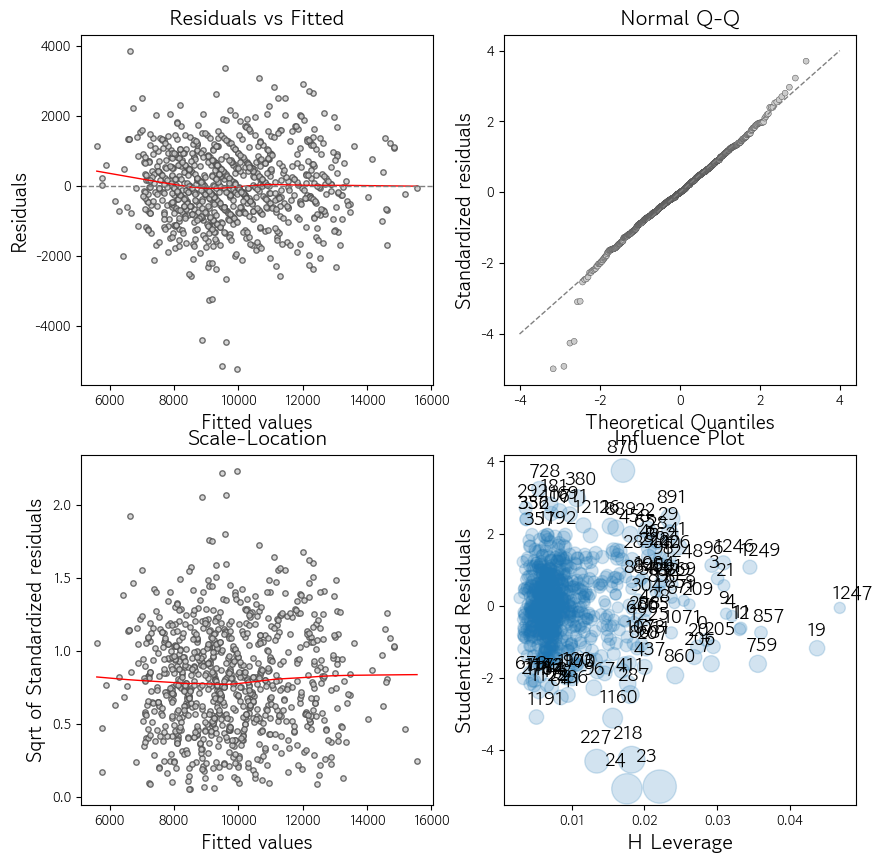

In [29]:
# fit1 모형의 잔차 그래프를 그립니다.
hds.regressionDiagnosis(model = fit1)

### 회귀진단: 잔차의 정규성 검정

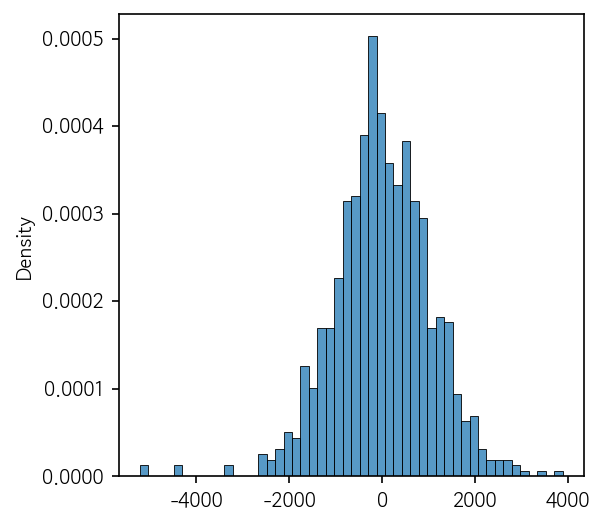

In [30]:
# 잔차의 히스토그램을 그려서 분포를 확인합니다.
sns.histplot(x = fit1.resid, bins = 50, stat = 'density');

In [31]:
# 잔차의 정규성 검정을 실행합니다.
pg.normality(data = fit1.resid)

,W,pval,normal
0,0.983313,1.928031e-08,False


### 영향점 확인

In [32]:
# 훈련셋의 관측값마다 영향점 정보를 갖는 데이터프레임을 생성합니다.
aug = hds.augment(model = fit1)

In [33]:
# aug의 처음 5행을 출력합니다.
aug.head()

,Price,fitted,resid,hat,sigma,cooksd,std_resid
1116,9950,8212.688258,1737.311742,0.008931,1051.128267,0.003099,1.658558
65,13950,12045.570187,1904.429813,0.020054,1050.768082,0.008552,1.828390
412,9950,10436.102722,-486.102722,0.005722,1052.669413,0.000154,-0.463318
1210,8950,9550.133259,-600.133259,0.005730,1052.601081,0.000236,-0.572006
1219,8500,7485.487933,1014.512067,0.012813,1052.227829,0.001528,0.970426


In [34]:
# 훈련셋의 행 개수를 n에 할당합니다.
n = trSetX.shape[0]

In [35]:
# 쿡의 거리가 4/n(행 개수) 초과 여부를 원소로 갖는 Out을 훈련셋에 추가합니다.
trSetX['Out'] = np.where(aug['cooksd'].gt(4/n), '1', '0')

### [참고] 영향점 시각화

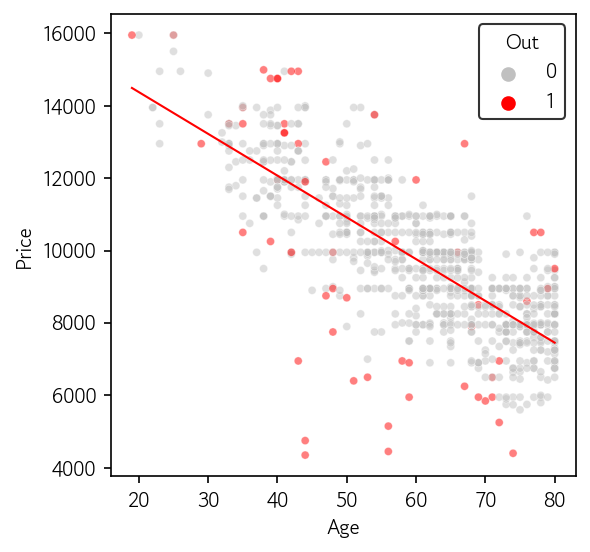

In [36]:
# Age와 Price의 산점도에 회귀직선을 추가하고 영향점의 색을 다르게 설정합니다.
sns.scatterplot(x = trSetX['Age'], y = trReal, hue = trSetX['Out'], 
                s = 15, alpha = 0.5, hue_order = ['0', '1'], 
                palette = ['silver', 'red'])

sns.regplot(x = trSetX['Age'], y = trReal, 
            scatter_kws = {'alpha': 0}, 
            line_kws = {'color': 'red', 'lw': 1},
            ci = None);

### 훈련셋에서 이상치 제거

In [37]:
# 훈련셋에서 Out의 범주별 빈도수를 확인합니다.
trSetX['Out'].value_counts()

0    818
1     57
Name: Out, dtype: int64

In [38]:
# 훈련셋에서 이상치인 행이름을 outIndex에 할당합니다.
outIndex = trSetX[trSetX['Out'].eq('1')].index
outIndex

Int64Index([  65,  862,   40,   19,  458,  893,  206, 1170,  728,  486,  870,
             222,  641,  181, 1211,   90,  380,   46,  439,  903,  759, 1249,
              35,  178,  100,  892,   22,  218,  205,   96,  107,  213,   26,
             237,    7,   29,  411,  437,  282,  227,  426,  120, 1160,  891,
             860,  967, 1191,  197,   24,   41,  287, 1246,  889,   23,  169,
             611,   28],
           dtype='int64')

In [39]:
# 훈련셋에서 이상치인 행과 불필요한 열을 제거합니다.
trSetX = trSetX.drop(index = outIndex, columns = ['Out'])
trReal = trReal.drop(index = outIndex)

### 선형 회귀모형 재적합 및 결과 확인

In [40]:
# 이상치를 제거한 훈련셋으로 선형 회귀모형을 적합합니다.
fit2 = ols(y = trReal, X = trSetX)

In [41]:
# fit2 모형의 적합 결과를 확인합니다.
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     426.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          8.51e-267
Time:                        17:31:28   Log-Likelihood:                -6696.8
No. Observations:                 818   AIC:                         1.341e+04
Df Residuals:                     810   BIC:                         1.345e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3432.0746   2083.542     -1.647      0.100   -7521.853     657.704
Age          -95.4639      2.581    -36.992      0.000    -100.529     -90.398
KM            -0.0156      0.001    -13.317      0.000      -0.018      -0.013
HP             1.8192      4.414      0.412      0.680      -6.846      10.484
MetColor      -7.5377     65.265     -0.115      0.908    -135.646     120.571
Doors         28.8330     41.435      0.696      0.487     -52.499     110.165
Weight        17.6152      2.089      8.434      0.000      13.516      21.715
Petrol      1195.3627    304.186      3.930      0.000     598.278    1792.448
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.048
Skew:                           0.039   Prob(JB):                        0.592
Kurtosis:                       2.843   Cond. No.                     5.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# fit2 모형 잔차의 등분산성 검정을 실행합니다.
hds.breushpagan(model = fit2)

,Statistic,P-Value,F-Value,F P-Value
0,8.366185,0.301414,1.19571,0.302525


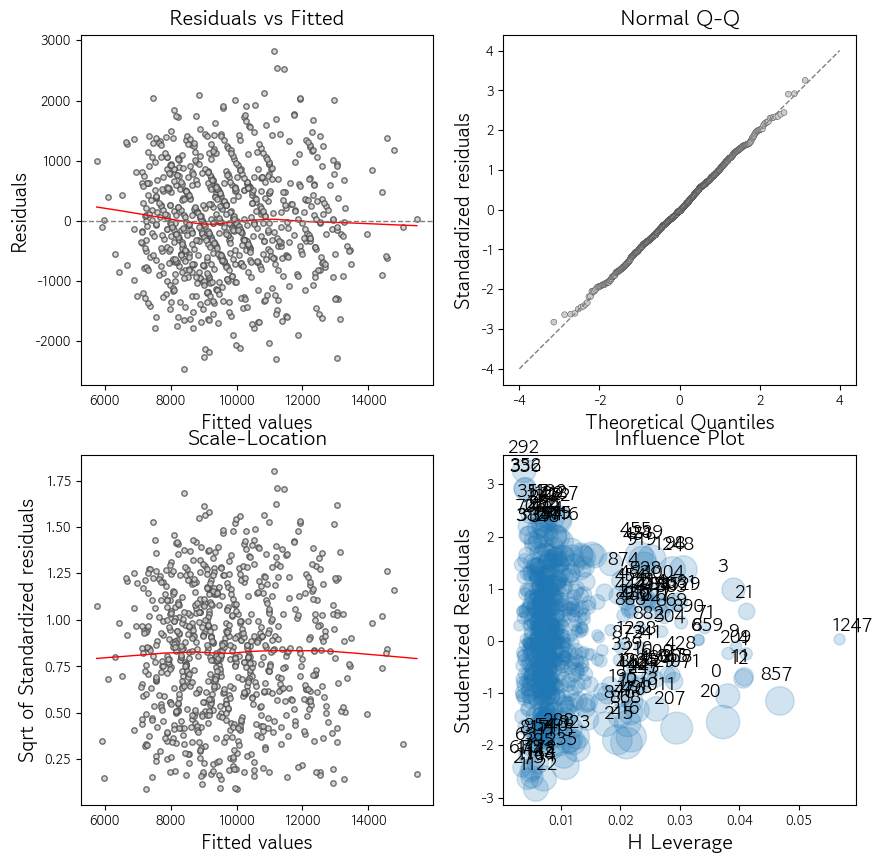

In [43]:
# fit2 모형의 잔차 그래프를 그립니다.
hds.regressionDiagnosis(model = fit2)

### [참고] 더미변수의 시각적 이해

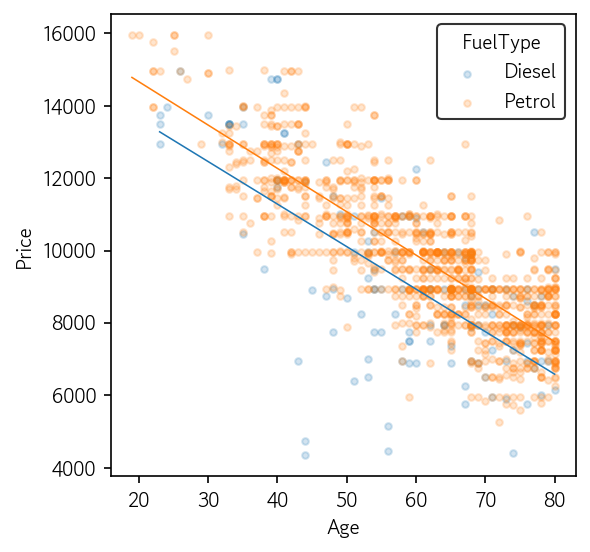

In [44]:
# Age와 Price의 회귀직선은 FuelType에 따라 달라집니다.
labels = ['Diesel', 'Petrol']
for i, v in enumerate(labels):
    sns.regplot(data = df[df['Petrol'].eq(i)], 
                x = 'Age', y = 'Price', 
                ci = None, label = v, 
                scatter_kws = {'s': 10, 'alpha': 0.2})
plt.legend(loc = 'best', title = 'FuelType');

### 목표변수의 추정값 생성

In [45]:
# 훈련셋으로 fit1과 fit2 모형의 추정값을 생성하고 실제값과 비교합니다.
trPred1 = fit1.predict(exog = trSetX)
trPred2 = fit2.predict(exog = trSetX)
pd.DataFrame(data = {'Real': trReal, 'Pred1': trPred1, 'Pred2': trPred2})

,Real,Pred1,Pred2
1116,9950,8212.688258,8226.681854
412,9950,10436.102722,10394.199786
1210,8950,9550.133259,9514.325996
1219,8500,7485.487933,7515.104154
272,11450,9529.456411,9572.011526
...,...,...,...
763,7750,8545.952059,8566.167320
835,10900,10344.562892,10345.162525
1216,8250,9772.272505,9756.644043
559,8950,9540.716942,9520.295364


In [46]:
# 시험셋으로 fit1과 fit2 모형의 추정값을 생성하고 실제값과 비교합니다.
tePred1 = fit1.predict(exog = teSetX)
tePred2 = fit2.predict(exog = teSetX)
pd.DataFrame(data = {'Real': teReal, 'Pred1': tePred1, 'Pred2': tePred2})

,Real,Pred1,Pred2
711,8250,8800.801021,8845.334621
898,6500,6284.138610,6466.254731
186,14350,11924.453203,11947.344194
867,6500,6801.433045,6950.609137
18,14900,14557.039154,14479.868632
...,...,...,...
881,7950,7299.860934,7417.890822
367,12950,11563.424966,11546.141069
608,8950,9845.690039,9854.445784
968,8750,8101.974953,8135.849844


### 회귀모형 성능 평가

In [47]:
# 훈련셋으로 fit1 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = trReal, y_pred = trPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,758864.050552,871.128033,0.093222,700.06119,0.07487


In [48]:
# 훈련셋으로 fit2 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = trReal, y_pred = trPred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,755913.113385,869.432639,0.093082,697.674218,0.074753


In [49]:
# 시험셋으로 fit1 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = teReal, y_pred = tePred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,928775.18109,963.729828,0.10482,759.234224,0.08115


In [50]:
# 시험셋으로 fit2 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.6213,956.297873,0.103322,754.908886,0.080621


### [참고] MSE, MSLE, MAE, MAPE 관련 함수

In [51]:
# 관련 라이브러리를 호출합니다.
from sklearn import metrics

In [52]:
# 시험셋 추정값으로 MSE를 출력합니다.
metrics.mean_squared_error(y_true = teReal, y_pred = tePred2)

914505.6213003318

In [53]:
# 시험셋 추정값으로 MSLE를 출력합니다.
metrics.mean_squared_log_error(y_true = teReal, y_pred = tePred2)

0.010675448575825761

In [54]:
# 시험셋 추정값으로 MAE를 출력합니다.
metrics.mean_absolute_error(y_true = teReal, y_pred = tePred2)

754.9088863317701

In [55]:
# 시험셋 추정값으로 MAPE를 출력합니다.
metrics.mean_absolute_percentage_error(y_true = teReal, y_pred = tePred2)

0.080620632774407

### 다중공선성 확인

In [56]:
# 분산팽창지수를 출력하고 다중공선성 입력변수를 확인합니다.
hds.vif(X = trSetX)

,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,1.277925,1.525285,3.11695,1.014911,1.66822,4.660574,6.113231


In [57]:
# 다중공선성 입력변수가 있다고 가정하고 훈련셋에서 삭제합니다.
trSetX1 = trSetX.drop(columns = ['Petrol'])

In [58]:
# 입력변수별 분산팽창지수를 다시 출력합니다.
hds.vif(X = trSetX1)

,Age,KM,HP,MetColor,Doors,Weight
0,1.260756,1.424805,1.146407,1.010759,1.3369,1.503799


### 단계적방법으로 선형 회귀모형 적합

In [59]:
# 단계적방법으로 선형 회귀모형을 적합합니다.
fit3 = hds.stepwise(y = trReal, X = trSetX, direction = 'both')

In [60]:
# fit3 모형의 적합 결과를 확인합니다.
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     749.3
Date:                Mon, 23 Jan 2023   Prob (F-statistic):          6.39e-271
Time:                        17:31:30   Log-Likelihood:                -6697.1
No. Observations:                 818   AIC:                         1.340e+04
Df Residuals:                     813   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4457.5787   1447.801     -3.079      0.002   -7299.448   -1615.710
Age          -95.5644      2.569    -37.193      0.000    -100.608     -90.521
KM            -0.0156      0.001    -13.326      0.000      -0.018      -0.013
Weight        18.7371      1.249     14.997      0.000      16.285      21.189
Petrol      1339.1472    169.036      7.922      0.000    1007.348    1670.946
==============================================================================
Omnibus:                        1.064   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.125
Skew:                           0.045   Prob(JB):                        0.570
Kurtosis:                       2.843   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# fit3 모형 잔차의 등분산성 검정을 실행합니다.
hds.breushpagan(model = fit3)

,Statistic,P-Value,F-Value,F P-Value
0,2.377408,0.666714,0.592441,0.668196


### 표준화 회귀계수 확인

In [62]:
# fit3 모형의 회귀계수를 출력합니다.
fit3.params

Intercept   -4457.578687
Age           -95.564396
KM             -0.015560
Weight         18.737084
Petrol       1339.147200
dtype: float64

In [63]:
# 표준화 회귀계수를 생성합니다.
beta_z = hds.std_coefs(model = fit3)
beta_z

Intercept   -0.000000
Age         -0.679624
KM          -0.265951
Weight       0.314424
Petrol       0.176717
dtype: float64

In [64]:
# 표준화 회귀계수의 절대값을 오름차순 정렬한 결과를 출력합니다.
beta_z.abs().sort_values()

Intercept    0.000000
Petrol       0.176717
KM           0.265951
Weight       0.314424
Age          0.679624
dtype: float64

### 회귀모형 성능 평가

In [65]:
# 시험셋으로 fit3 모형의 추정값을 생성합니다.
tePred3 = fit3.predict(exog = teSetX)

In [66]:
# 시험셋으로 fit3 모형의 성능지표를 출력합니다.
hds.regmetrics(y_true = teReal, y_pred = tePred3)

,MSE,RMSE,RMSLE,MAE,MAPE
0,911188.631242,954.56201,0.103245,751.766366,0.080308


In [67]:
# 시험셋으로 fit2 모형의 성능지표와 비교합니다.
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.6213,956.297873,0.103322,754.908886,0.080621


## End of Document